# Fraud in wine

Wine fraud realtes to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adultarted, usually with the addition of cheaper products(eg: juices) and sometimes with harmful chemicals and sweetners(compensating for color or a flavour)

Counterfeiting and the relabelling of inferior and cheaper wines to more experince brand in other type of wine fraud

## Project Goals
A distribution comapny that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples . The distribution company specailizies in exporting extermly high quality , expensive wines but was defaruded by supplier who was attempting to pass off cheap ,low quality wine as higher grade wine

The distribution comapny has hired you to attempt to create a ML model that can detect low quality (a.k.a "fraud") wine samples .They want to know if it is even possible to detect such a diffrence 

In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('wine_fraud.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [7]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

In [9]:
# lets create a count plot legit vs fraud

In [13]:
df['quality'].value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

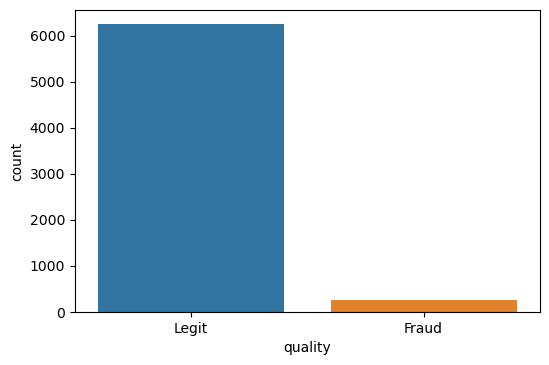

In [12]:
plt.figure(dpi=100)
sns.countplot(data=df,x='quality')

We can already tell that the classes are unbalanced, we will have to deal with this when fitting the model

Let's find out if there is a difference between red and white wine when it comes to fraud. Countplot that has the wine type on the x axis with the hue separating columns by Fraud vs Legit.

<AxesSubplot:xlabel='type', ylabel='count'>

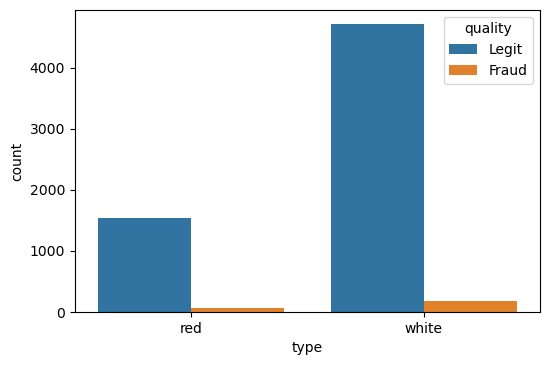

In [17]:
plt.figure(dpi=100)
sns.countplot(data=df,x='type',hue="quality")

What percentage of red wines are Fraud? What percentage of white wines are fraud?

In [18]:
reds = df[df["type"]=='red']

In [20]:
whites = df[df["type"]=='white']

In [34]:
print("percentage of red wine farud")
print(100* len(reds[reds['quality']=='Fraud'])/len(reds))

percentage of red wine farud
3.9399624765478425


In [36]:
print("percentage of white wine farud")
print(100* len(whites[whites['quality']=='Fraud'])/len(whites))

percentage of white wine farud
3.736218864842793


We can tell that the percentages are about the same

Let's calculate the correlation between the various features and the "quality" column. To do this you may need to map the column to 0 and 1 instead of a string.

In [37]:
df['Fraud']= df['quality'].map({'Legit':0,'Fraud':1})

In [38]:
df['Fraud']

0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: Fraud, Length: 6497, dtype: int64

In [40]:
df.corr()['Fraud']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64

<AxesSubplot:>

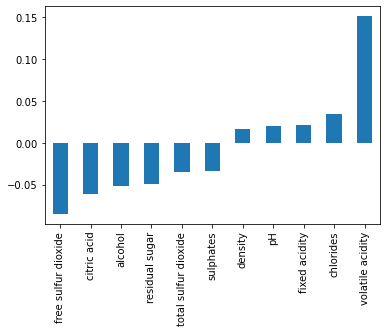

In [47]:
df.corr()['Fraud'][:-1].sort_values().plot(kind='bar')

Clustermap to explore the relationships between variables.

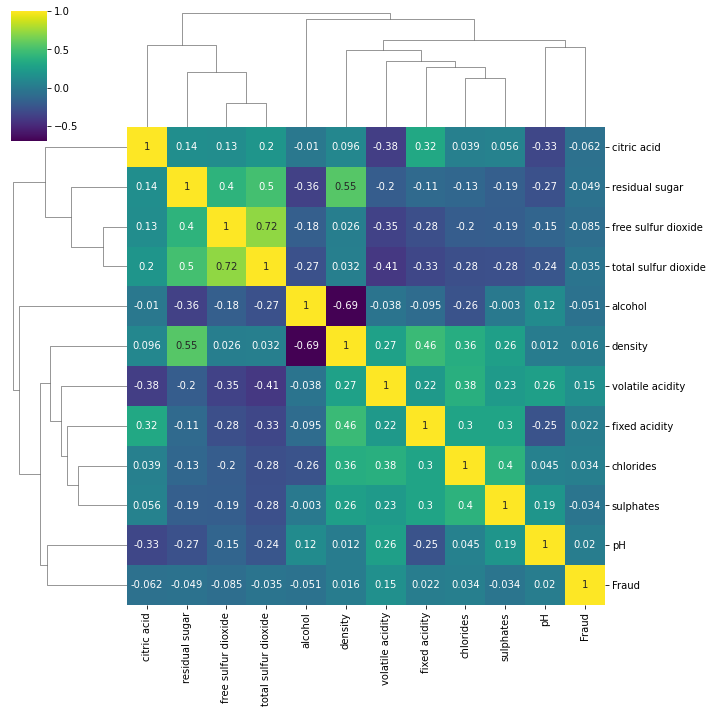

In [52]:
sns.clustermap(df.corr(),cmap='viridis',annot=True)

### Machine Learning Model
first let's convert the categorical column "type" from a string or "red" or "white" to dummy variables: 

In [54]:
df['type'] = pd.get_dummies(df['type'],drop_first=True)

Let's separate out the data into X features and y target label ("quality" column)

In [63]:
X = df.drop('quality',axis=1)
y = df['quality']

In [70]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


In [71]:
y

0       Legit
1       Legit
2       Legit
3       Legit
4       Legit
        ...  
6492    Legit
6493    Legit
6494    Legit
6495    Legit
6496    Legit
Name: quality, Length: 6497, dtype: object

Train|Test split on the data, with a 10% test size.

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

Scale the X train and X test data

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()

In [69]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

Instance of a Support Vector Machine classifier and adjust of the class weight parameter, because the unbalance in classes

In [72]:
from sklearn.svm import SVC

In [73]:
svc = SVC(class_weight='balanced')

GridSearchCV to run a grid search for the best C and gamma parameters.

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}
grid = GridSearchCV(svc,param_grid)

In [77]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

Best parameter

In [78]:
grid.best_params_

{'C': 1, 'gamma': 'auto'}

Confusion matrix and classification report for the model.

In [79]:
from sklearn.metrics import confusion_matrix,classification_report, plot_confusion_matrix

In [80]:
grid_pred = grid.predict(scaled_X_test)

In [81]:
confusion_matrix(y_test,grid_pred)

array([[ 17,  10],
       [ 92, 531]], dtype=int64)

C:\Users\monis\anaconda3\Anakonda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


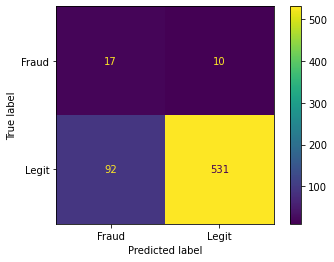

In [83]:
plot_confusion_matrix(grid,scaled_X_test,y_test);

In [84]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



## Conclusion of the poor results
Due to class unbalance there is not enough attributes to properly predict if a wine is Legit or Fraud, we can tell that by looking at the precision and recall values for Fraud, these are very low, the next steps should be to look further into other specifications, like where did you get these bottles, when, etc.